In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)
print(df.head())

             name  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colours  ...  saltires  quarters  sunstars  crescent  triangle  \
0        3        5  ...         0         0         1         0         0   
1        0        3  ...         0         0         1         0         0   
2        0        3  ...         0         0         1         1         0   
3        0        5  ...         0         0         0         0         1   
4        0        3  ...         0         0         0         0         0   

   icon  animate text  topleft  botright  
0

In [3]:
#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [4]:
#Print number of countries by landmass, or continent
print(df['landmass'].value_counts())

landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64


In [5]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df['landmass'].isin([3,6])]

In [6]:
labels = (df["landmass"].isin([3,6]))*1
print(df_36[var].dtypes)

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


In [7]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depthbdd
data = pd.get_dummies(df[var])
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1, test_size=.4)
depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

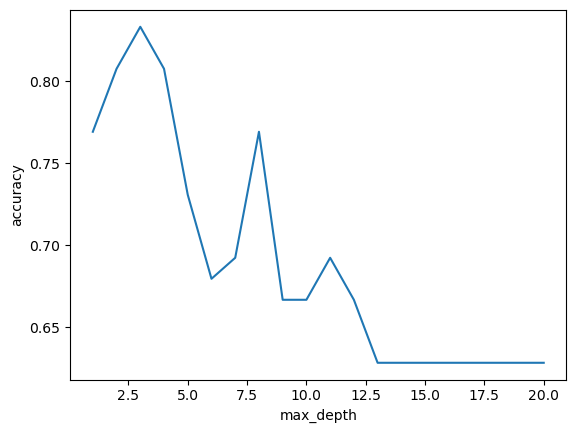

In [8]:
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [9]:
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
for i in range(len(acc_depth)):
    if acc_depth[i] == max_acc:
        bes_depth = i+1
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {bes_depth}')

Highest accuracy 83.3% at depth 3


In [10]:
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 83.3% at depth 3


0.8076923076923077


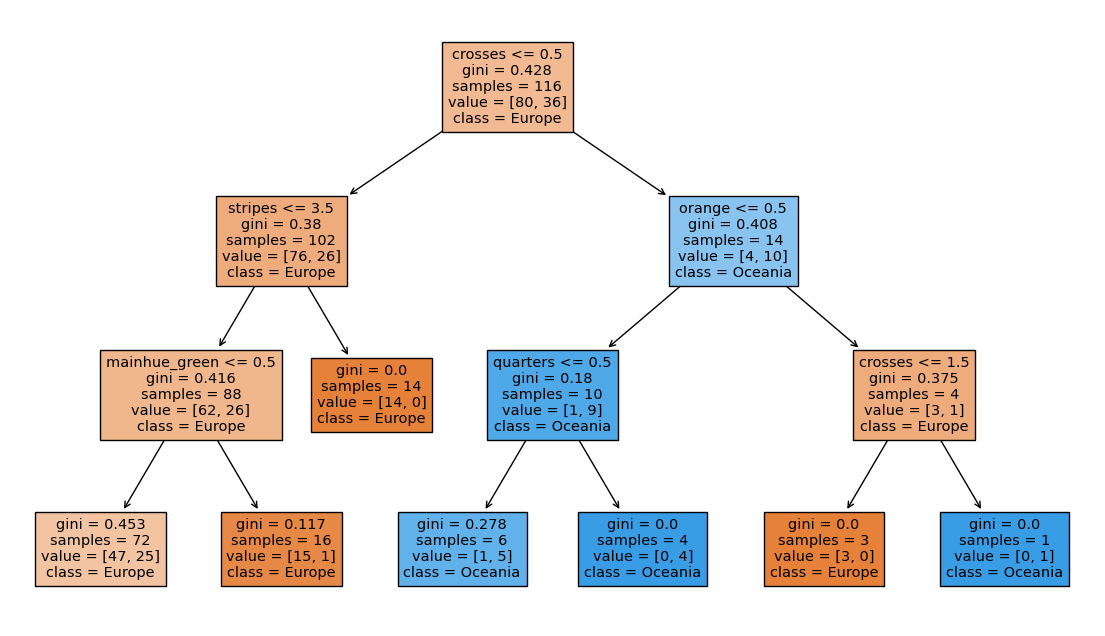

In [21]:
#Refit decision tree model with the highest accuracy and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(train_data, train_labels)
print(dt.score(test_data,test_labels))
tree.plot_tree(dt, feature_names = train_data.columns.tolist(), class_names = ['Europe', 'Oceania'], filled=True)
plt.show()

In [12]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through the values of ccp and append the scores to the list
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))

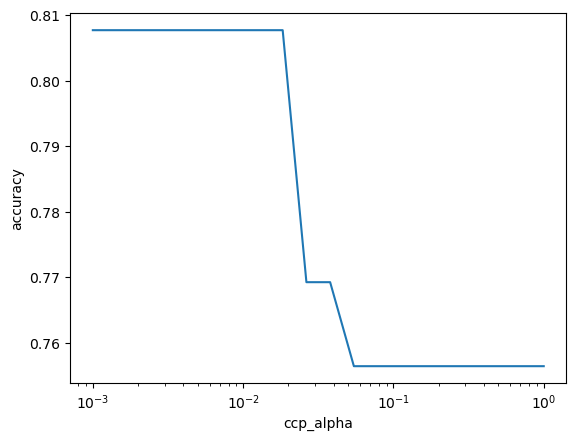

In [13]:
plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

In [14]:
#Find the largest accuracy and the ccp value this occurs
#All the parameters of the Decission Tree can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')

Highest accuracy 80.80000000000001% at ccp_alpha 0.001


In [15]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp)
dt_final.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3, random_state=1)

0.8076923076923077


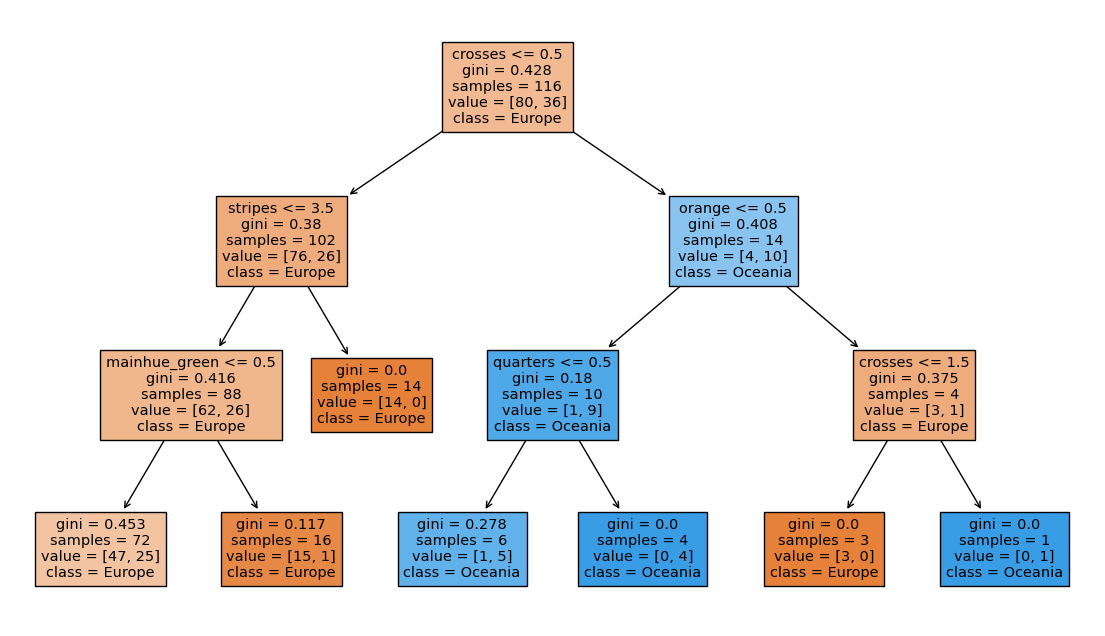

In [19]:
#Plot the final decision tree
plt.figure(figsize=(14,8))
print(dt_final.score(test_data,test_labels))
tree.plot_tree(dt_final, feature_names = train_data.columns.tolist(), class_names = ['Europe', 'Oceania'], filled=True)
plt.show()